In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


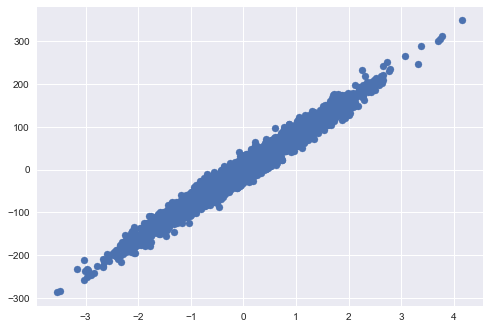

In [14]:
X=pd.read_csv('./Linear_X_Train.csv')
X=np.array(X)
y=pd.read_csv('./Linear_Y_Train.csv')
y=np.array(y)
u=np.mean(X)
std=np.std(X)
X=(X-u)/std
plt.style.use('seaborn')
plt.scatter(X,y)

In [15]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        x=X[i]
        y=Y[i]
        y_=hypothesis(x,theta)
        grad[0]+=y_- y
        grad[1]+=(y_- y)*x
    return grad/m

def error(X,Y,theta):
    m=X.shape[0]
    error=0.0
    for i in range(m):
        error+= (y[i]-hypothesis(X[i],theta))**2
    return error/m

def gradientdescent(X,Y,maxsteps=100,learning_rate=0.1):
    theta=np.zeros((2,))
    errorlist=[]
    for i in range(maxsteps):
        e=error(X,Y,theta)
        errorlist.append(e)
        grad=gradient(X,Y,theta)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    return theta,errorlist
        
 

[ 0.6838508  79.90361453]
[array([6576.35005246]), array([5363.12510257]), array([4380.41289317]), array([3584.41600355]), array([2939.65852295]), array([2417.40496367]), array([1994.37958066]), array([1651.72902041]), array([1374.18206661]), array([1149.36903404]), array([967.27047765]), array([819.77064698]), array([700.29578413]), array([603.52114523]), array([525.13368772]), array([461.63984713]), array([410.20983626]), array([368.55152745]), array([334.80829731]), array([307.47628091]), array([285.33734761]), array([267.40481165]), array([252.87945752]), array([241.11392067]), array([231.58383582]), array([223.8644671]), array([217.61177843]), array([212.54710061]), array([208.44471157]), array([205.12177646]), array([202.43019901]), array([200.25002128]), array([198.48407732]), array([197.05366271]), array([195.89502687]), array([194.95653185]), array([194.19635088]), array([193.58060429]), array([193.08184956]), array([192.67785822]), array([192.35062524]), array([192.08556653])

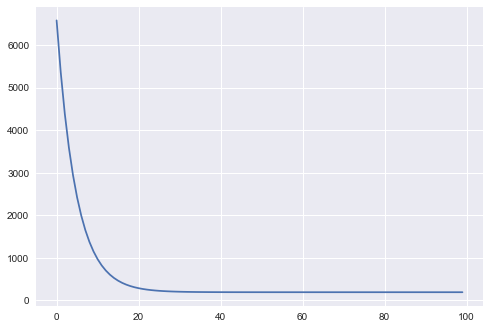

In [16]:
theta,errorlist=gradientdescent(X,y)
plt.plot(errorlist)
print(theta)
print(errorlist)

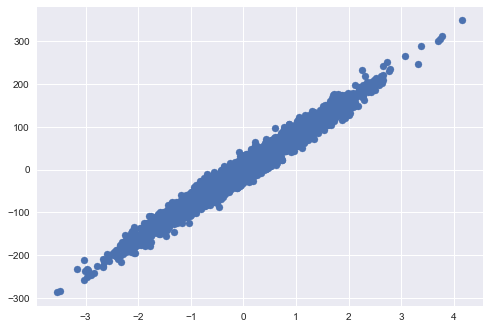

In [17]:
plt.scatter(X,y)

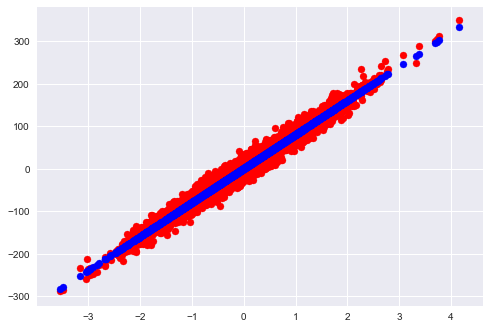

In [18]:
y_=hypothesis(X,theta)
plt.scatter(X,y,color='red')
plt.scatter(X,y_,color='blue')
plt.show()

In [19]:
X_test=pd.read_csv('./Linear_X_Test.csv').values
Y_test=hypothesis(X_test,theta)
df=pd.DataFrame(data=Y_test,columns=["y"])
df.to_csv('y_pred.csv',index=False)

def rsquare(y,y_):
    num=np.mean((y-y_)**2)
    deno=np.mean((y-np.mean(y))**2)
    error=1-num/deno
    return error*100
rsquare(y,y_)

97.09612226971643

## plotting the loss function

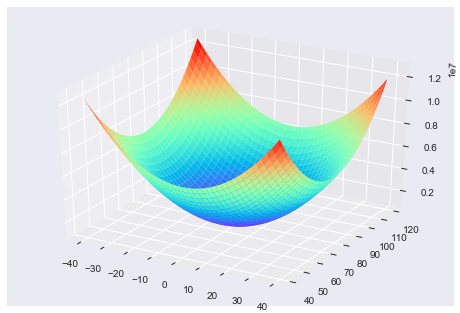

In [24]:
#print(theta)
T0=np.arange(-40,40,1)
T1=np.arange(40,120,1)
T0,T1=np.meshgrid(T0,T1)
J=np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_=T1[i][j]*X+T0[i][j]
        J[i][j]=np.sum((y_-y)**2)

fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')

### plotting the contours for loss func

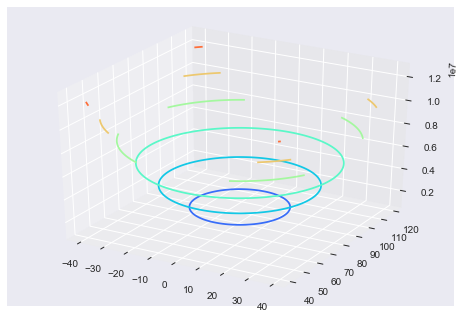

In [31]:

fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')